In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:,[2,3]]
y = iris.target

In [3]:
tree1 = DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=0).fit(x,y)

##### max_depth = 1
- max_depth =1 : 자식노드 한번만 만듬(가지 하나)

In [4]:
import io
import pydot
from IPython.core.display import Image
from sklearn.tree import export_graphviz

In [5]:
def draw_decision_tree(model):
    dot_buf = io.StringIO()
    export_graphviz(model, out_file=dot_buf, feature_names=iris.feature_names[2:])
    graph = pydot.graph_from_dot_data(dot_buf.getvalue())
    image = graph.create_png()
    return Image(image)

In [6]:
def plot_decision_region(x,y, model, title):
    resolution = 0.01
    markers = ('s','^','o')
    colors = ('red','blue','lightgreen')
    cmap = mpl.colors.ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1 # petal_length
    x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1 # petal_width
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max,resolution))
    z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T).reshape(xx1.shape)
    
    plt.contour(xx1, xx2, z, cmap=mpl.colors.ListedColormap(['k']))
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=x[y==cl,0], y=x[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], s=80, label=cl)
        
    plt.xlabel(iris.feature_names[2])
    plt.ylabel(iris.feature_names[3])
    plt.legend(loc='upper left')
    plt.title(title)

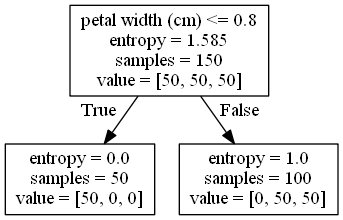

In [7]:
draw_decision_tree(tree1)

위 그림은 가장 정보획득량이 높은 경우로 보여줌
- petal width <= 0.8 의 기준값(threshold)이 해당 모델에서 가장 Information Gain이 높음

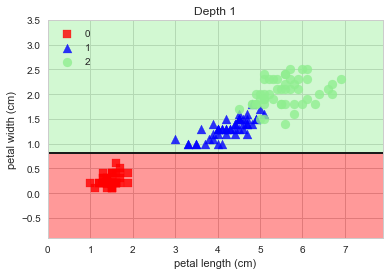

In [8]:
plot_decision_region(x,y,tree1, "Depth 1")

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y, tree1.predict(x))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0, 50,  0]], dtype=int64)

##### max_depth = 2

In [9]:
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0).fit(x,y)

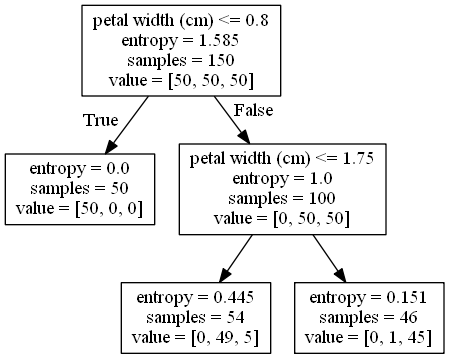

In [11]:
draw_decision_tree(tree2)

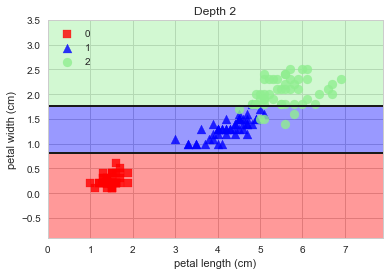

In [12]:
plot_decision_region(x,y,tree2,"Depth 2")

In [13]:
confusion_matrix(y, tree2.predict(x))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  5, 45]], dtype=int64)

6개 빗나감

##### max_depth = 3

In [14]:
tree3 = DecisionTreeClassifier(criterion='entropy',max_depth=3, random_state=0).fit(x,y)

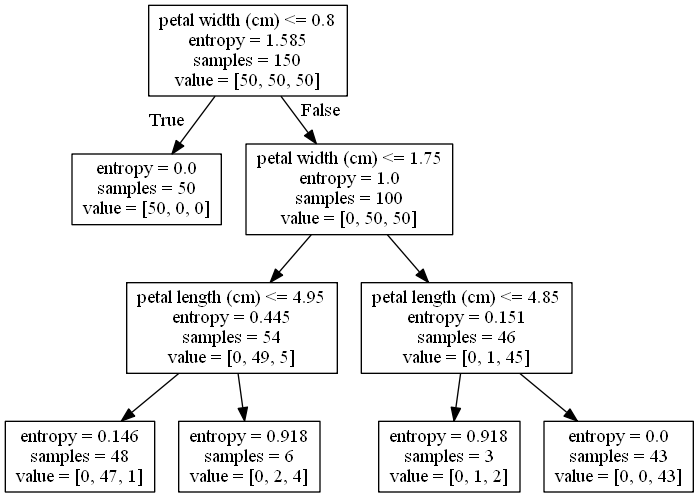

In [15]:
draw_decision_tree(tree3)

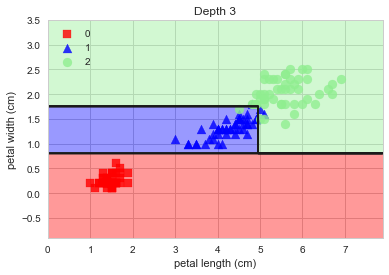

In [16]:
plot_decision_region(x,y,tree3,"Depth 3")

In [23]:
confusion_matrix(y, tree3.predict(x))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]], dtype=int64)

##### max_depth = 4

In [24]:
tree4 = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=0).fit(x,y)

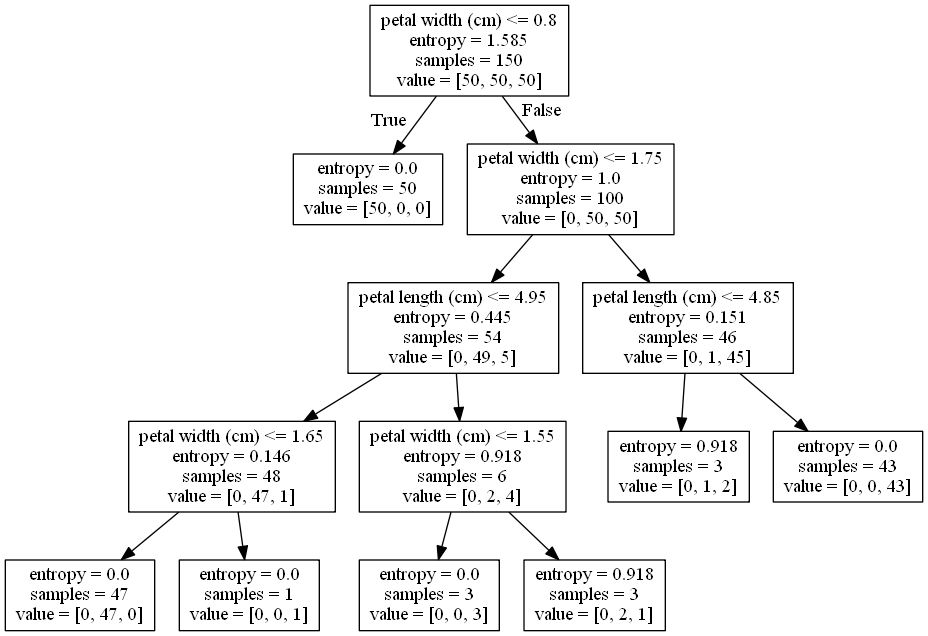

In [25]:
draw_decision_tree(tree4)

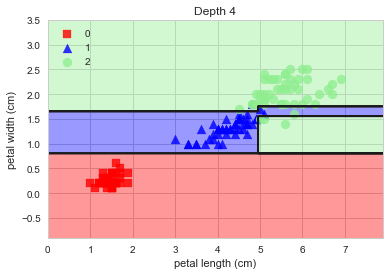

In [26]:
plot_decision_region(x,y,tree4, "Depth 4")

Overfitting 되었다는 걸 알 수 있다.

In [27]:
confusion_matrix(y, tree4.predict(x))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  1, 49]], dtype=int64)

##### max_depth = 5

In [28]:
tree5 = DecisionTreeClassifier(criterion='entropy',max_depth=5, random_state=0).fit(x,y)

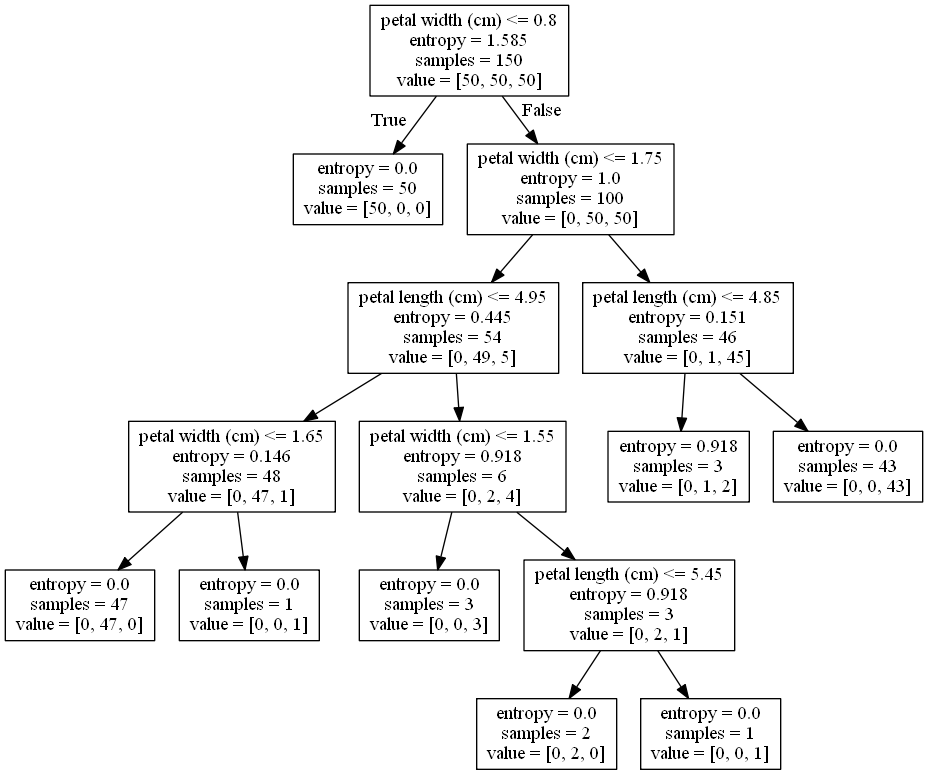

In [29]:
draw_decision_tree(tree5)

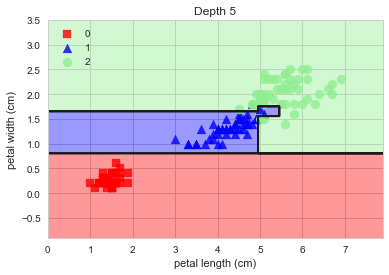

In [30]:
plot_decision_region(x,y,tree5, "Depth 5")

In [31]:
confusion_matrix(y,tree5.predict(x))

array([[50,  0,  0],
       [ 0, 49,  1],
       [ 0,  0, 50]], dtype=int64)

##### accuracy 측정

In [32]:
from sklearn.metrics import accuracy_score

In [43]:
for tree in [tree1,tree2,tree3,tree4,tree5]:
    print(accuracy_score(y, tree.predict(x)))

0.666666666667
0.96
0.973333333333
0.986666666667
0.993333333333


#### 연습문제 1
1. 붓꽃 분류 문제에서 꽃잎의 길이와 폭을 사용하여 위와 같이 의사 결정 나무 모형을 만들고 정확도(accuracy) 기준으로 성능을 측정한다.
2. K=5 인 교차 검증을 통해 테스트 성능 평균을 측정한다.
3. max_depth 인수를 바꾸어 가면서 테스트 성능 평균을 구하여 cross validation curve를 그리고 가장 테스트 성능 평균이 좋은 max_depth 인수를 찾아라.

In [45]:
from sklearn.model_selection import cross_val_score

In [72]:
def make_treeModel_cv(x,y,depth):
    accuracies = []
    scores = []
    for i in range(1,depth+1):
        tree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=0).fit(x,y)
        scores.append(cross_val_score(tree, x,y, cv=5).mean())
        accuracies.append(accuracy_score(y,tree.predict(x)))
    return scores, accuracies

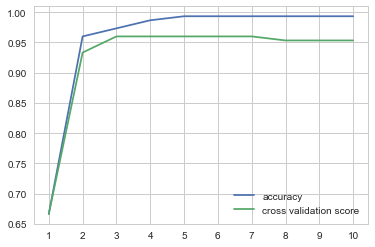

In [79]:
scores, accuracies = make_treeModel_cv(x,y,10)

plt.plot(list(range(1,11)),accuracies, label="accuracy")
plt.plot(list(range(1,11)),scores, label="cross validation score")
plt.xticks(list(range(1,11)))
plt.legend()
plt.show()

### 독립변수 2개씩 비교

In [81]:
from itertools import combinations

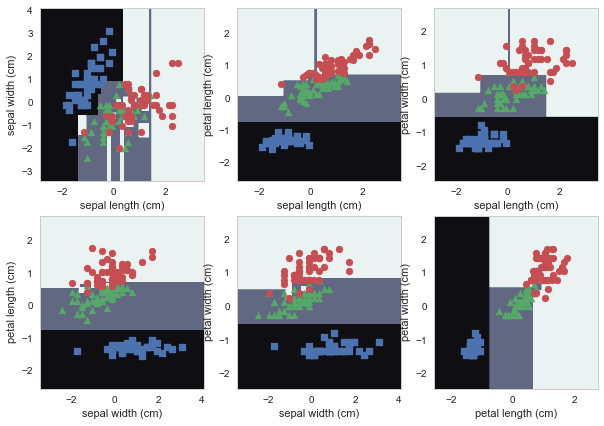

In [93]:
n_classes = 3
markers = ('s','^','o')
plot_step = 0.02

plt.figure(figsize=(10,7))
for pairidx, pair, in enumerate(combinations(range(4),2)):
    x = iris.data[:,pair]
    y = iris.target
    idx = np.arange(x.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    x = x[idx]
    y = y[idx]
    mean = x.mean(axis=0)
    std = x.std(axis=0)
    x = (x - mean) / std
    
    model = DecisionTreeClassifier().fit(x,y)
    
    plt.subplot(2,3,pairidx+1)
    x_min, x_max = x[:,0].min() - 1, x[:,0].max() + 1
    y_min, y_max = x[:,1].min() - 1, x[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                        np.arange(y_min, y_max, plot_step))
    z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    cs = plt.contourf(xx,yy,z,cmap=plt.cm.bone)
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
    for i, marker in zip(range(n_classes),markers):
        idx = np.where(y==i)
        plt.scatter(x[idx,0], x[idx,1], marker=marker, label=iris.target_names[i])
plt.show()

그림에서 위쪽 3개는 overfitting된 걸 볼 수 있다. 

#### 타이타닉 생존 예측

In [94]:
df = sns.load_dataset("titanic")
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [129]:
feature = ["pclass","age","sex"]
dfx = df[feature].copy()
dfy = df["survived"].copy()
dfx.tail()

,pclass,age,sex
886,2,27.0,male
887,1,19.0,female
888,3,NaN,female
889,1,26.0,male
890,3,32.0,male


- 성별은 label Encoder로 0,1로 변경
- pclass는 multi-class, decision-tree에서 multi-class처리 안됨(one-hot encoding으로 대체한다)

In [98]:
from sklearn.preprocessing import LabelEncoder

In [130]:
dfx['sex'] = LabelEncoder().fit_transform(dfx['sex'])
dfx.sex.unique()

array([1, 0], dtype=int64)

In [131]:
dfx['age'].fillna(dfx.age.mean(),inplace=True)
dfx.tail()

,pclass,age,sex
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1
890,3,32.000000,1


NaN값을 평균나이로 대체한다.

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [132]:
dfx2 = pd.DataFrame(OneHotEncoder().fit_transform(dfx.pclass[:,np.newaxis]).toarray(),columns=['c1','c2','c3'], index=dfx.index)
dfx2.tail()

,c1,c2,c3
886,0.0,1.0,0.0
887,1.0,0.0,0.0
888,0.0,0.0,1.0
889,1.0,0.0,0.0
890,0.0,0.0,1.0


One-Hot Encoding은 transform().toarray()를 해줘야함  

In [133]:
dfx = pd.concat([dfx, dfx2], axis=1)
dfx.drop(['pclass'], axis=1, inplace=True)
dfx.tail()

,age,sex,c1,c2,c3
886,27.000000,1,0.0,1.0,0.0
887,19.000000,0,1.0,0.0,0.0
888,29.699118,0,0.0,0.0,1.0
889,26.000000,1,1.0,0.0,0.0
890,32.000000,1,0.0,0.0,1.0


In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.25, random_state=0)

In [135]:
model_titanic = DecisionTreeClassifier(criterion="entropy", max_depth=3,min_samples_leaf=5).fit(x_train, y_train)

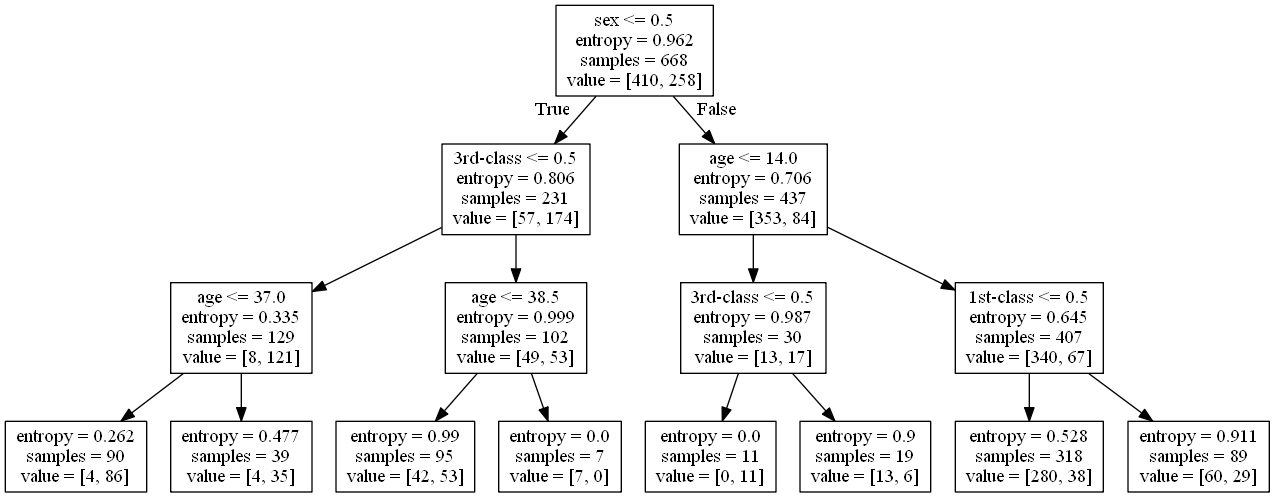

In [137]:
command_buf = io.StringIO()
export_graphviz(model_titanic, out_file=command_buf, feature_names=["age","sex","1st-class","2nd-class","3rd-class"])
graph = pydot.graph_from_dot_data(command_buf.getvalue())
image = graph.create_png()
Image(image)

In [138]:
confusion_matrix(y_train, model_titanic.predict(x_train))

array([[360,  50],
       [ 73, 185]], dtype=int64)

In [139]:
confusion_matrix(y_test, model_titanic.predict(x_test))

array([[119,  20],
       [ 25,  59]], dtype=int64)

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model_titanic.predict(x_train)))

             precision    recall  f1-score   support

          0       0.83      0.88      0.85       410
          1       0.79      0.72      0.75       258

avg / total       0.81      0.82      0.81       668



In [141]:
print(classification_report(y_test, model_titanic.predict(x_test)))

             precision    recall  f1-score   support

          0       0.83      0.86      0.84       139
          1       0.75      0.70      0.72        84

avg / total       0.80      0.80      0.80       223



### 연습문제 2
1. breast cancer 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
2. 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 기준은 무엇인가?

In [143]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='<U23')

### 연습문제 3
1. MINIST digit 이미지 분류 문제를 의사 결정 나무를 사용하여 풀어라. K=5인 교차 검증을 하였을 때 평균 성능을 구하라.
2. 모든 데이터를 학습 데이터로 사용하였을 때 첫번째로 선택되는 픽셀은 어디인가? 이 픽셀은 숫자들을 어떻게 구분하게 되며 왜 그렇게 구분지어지는지 생각하라.